In [1]:
# Dependencies and set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
# Loading CSV
df = pd.read_csv ('Data/2019 Winter Data Science Intern Challenge Data.csv')
df.head (10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [3]:
df.shape

(5000, 7)

# Data Exploration

In [4]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [5]:
# Looking deeper into shop_id
df['shop_id'].value_counts()

53    68
71    66
19    64
13    63
89    61
      ..
74    38
56    37
67    37
38    35
85    35
Name: shop_id, Length: 100, dtype: int64

In [6]:
# Looking deeper into order amount
df['order_amount'].value_counts()

153    87
306    85
354    82
312    75
156    75
       ..
404     1
948     1
920     1
816     1
980     1
Name: order_amount, Length: 258, dtype: int64

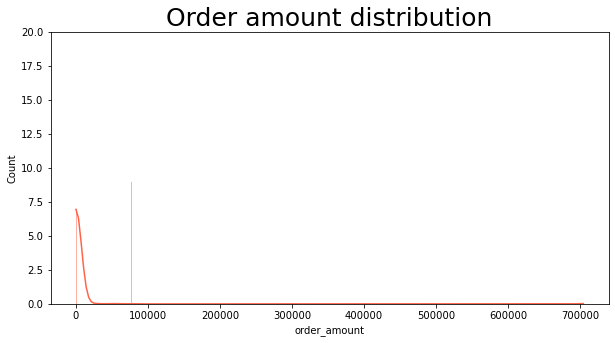

In [7]:
fig = plt.figure(figsize=(10,5))
sns.histplot(df['order_amount'], color='tomato', kde=True)
plt.title ('Order amount distribution', fontsize=25)
plt.ylim([0, 20])
plt.show()

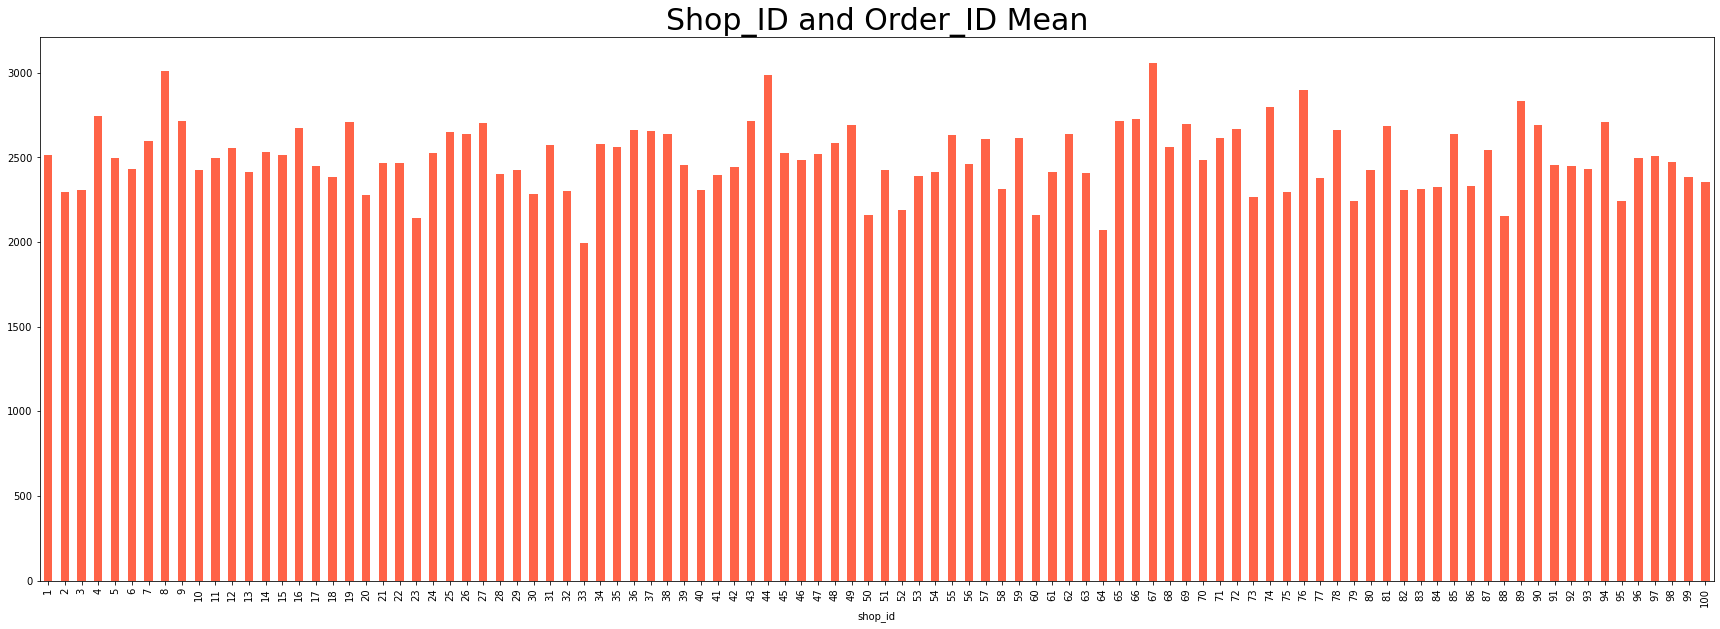

In [8]:
df_group_shop = df.groupby('shop_id')['order_id'].mean()
df_group_shop.plot.bar(figsize=(30,10), color='tomato')
plt.title('Shop_ID and Order_ID Mean', fontsize=30)
plt.show()

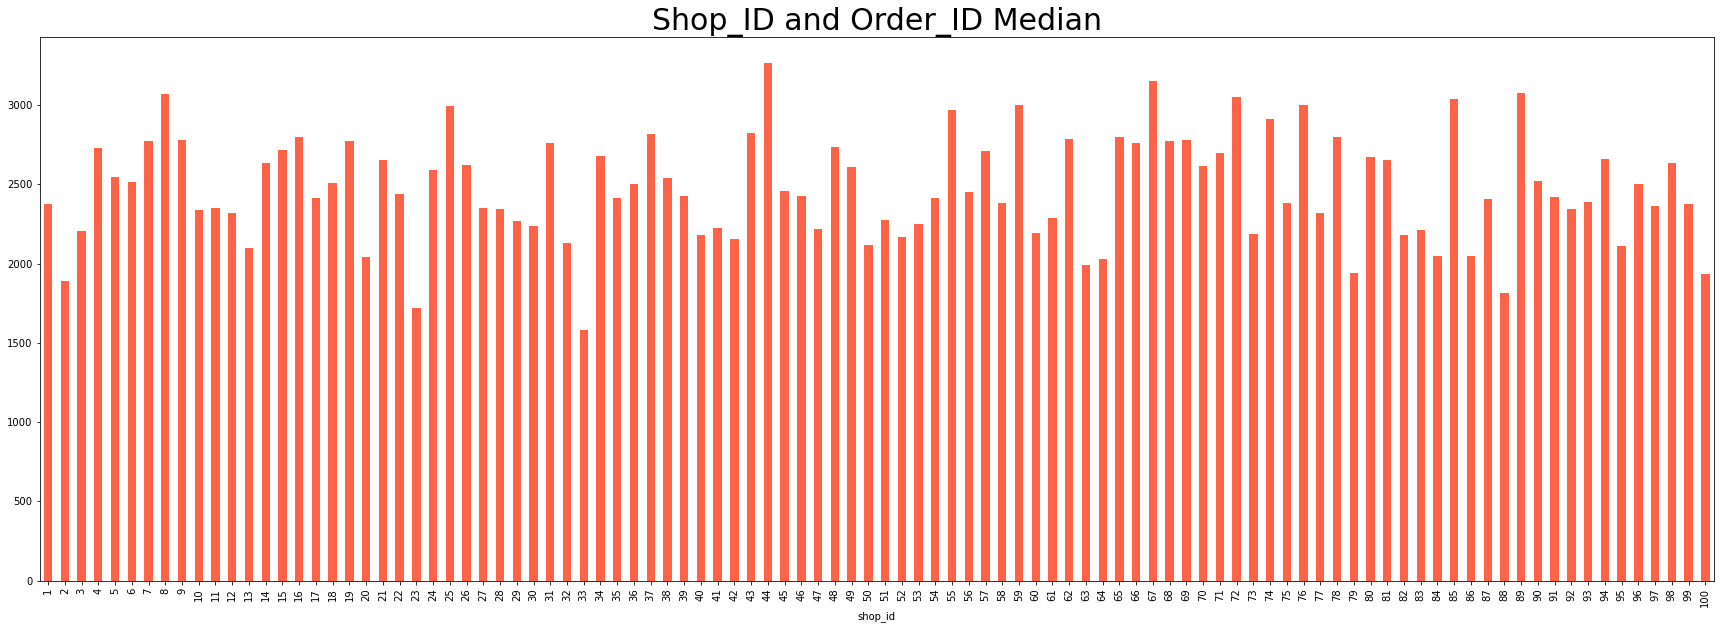

In [9]:
df_group_shop = df.groupby('shop_id')['order_id'].median()
df_group_shop.plot.bar(figsize=(30,10), color='tomato')
plt.title('Shop_ID and Order_ID Median', fontsize=30)
plt.show()

Both median and mean of shops have a pretty normal distribution. However, it is advisable to go further to find outliers.

Now we will focus on order_amount and finding any discrepancy.

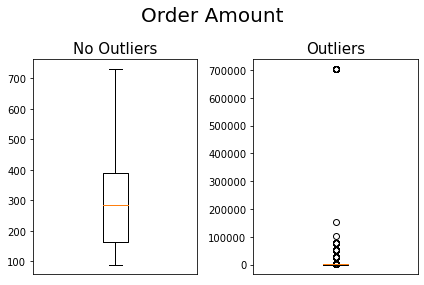

In [10]:
# Boxplot order_amount
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(df['order_amount'], showfliers=False)
ax[0].set_title("No Outliers", fontsize=15)
ax[0].get_xaxis().set_visible(False)
ax[1].boxplot(df['order_amount'], showfliers=True)
ax[1].set_title("Outliers", fontsize=15)
ax[1].get_xaxis().set_visible(False)
plt.suptitle('Order Amount', fontsize=20)
fig.tight_layout()
plt.show()

The boxplot shows us the outliers. Now that we have this overview, I can go deeper and do a group by user id and mean by order amount. Then, finally, I can trace those outliers and detect those that will affect the data.

In [11]:
# Groupby userid and their order amount mean
group_user = pd.DataFrame({'mean_amount': df.groupby('user_id')['order_amount'].mean()}).reset_index()
group_user

,user_id,mean_amount
0,607,704000.000000
1,700,299.375000
2,701,397.076923
3,702,406.615385
4,703,380.687500
...,...,...
296,995,354.400000
297,996,252.952381
298,997,2248.923077
299,998,291.111111


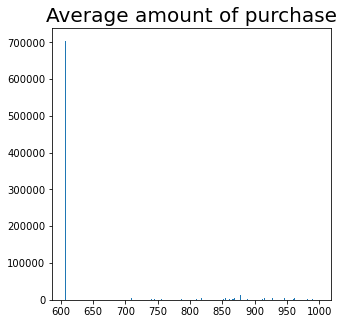

In [12]:
# Average amount of purchase
fig = plt.figure(figsize=(5,5))
plt.bar(group_user['user_id'], group_user['mean_amount'])
plt.title('Average amount of purchase',fontsize=20)
plt.show()

In [13]:
# Exploring user_id 607
user_id_607 = df[df['user_id']==607]
len(user_id_607)

17

In [14]:
user_id_607

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [15]:
user_id_607.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,17.000000,17.0,17.0,17.0,17.0
mean,2336.235294,42.0,607.0,704000.0,2000.0
std,1603.584872,0.0,0.0,0.0,0.0
min,16.000000,42.0,607.0,704000.0,2000.0
25%,1363.000000,42.0,607.0,704000.0,2000.0
50%,2154.000000,42.0,607.0,704000.0,2000.0
75%,3333.000000,42.0,607.0,704000.0,2000.0
max,4883.000000,42.0,607.0,704000.0,2000.0


The average purchase amount graphic shows us that <b>user_id 607</b> has big purchases. However, while exploring more about this user, 
I can fin more inconsistencies. For example, this user only buys in one store (shop_id 42), and the total _item in every single purchase is 2000 items on different dates.

This red flag can raise any alert; our next step will be to remove this outlier and continue the analysis.

In [16]:
subset = group_user[group_user['user_id']!=607]
subset

,user_id,mean_amount
1,700,299.375000
2,701,397.076923
3,702,406.615385
4,703,380.687500
5,704,275.285714
...,...,...
296,995,354.400000
297,996,252.952381
298,997,2248.923077
299,998,291.111111


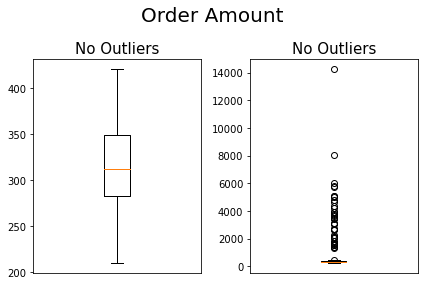

In [17]:
# Boxplot order_amount
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(subset['mean_amount'], showfliers=False)
ax[0].set_title("No Outliers", fontsize=15)
ax[0].get_xaxis().set_visible(False)
ax[1].boxplot(subset['mean_amount'], showfliers=True)
ax[1].set_title("No Outliers", fontsize=15)
ax[1].get_xaxis().set_visible(False)
plt.suptitle('Order Amount', fontsize=20)
fig.tight_layout()
plt.show()

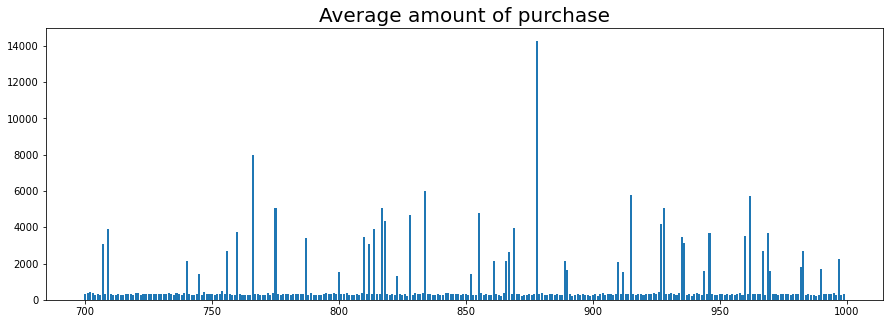

In [18]:
# Average amount of purchase
fig = plt.figure(figsize=(15,5))
plt.bar(subset['user_id'], subset['mean_amount'])
plt.title('Average amount of purchase',fontsize=20)
plt.show()

In [19]:
# Exploring user_id 878
user_id_878= subset[subset['user_id']==878]
user_id_878

,user_id,mean_amount
179,878,14266.909091


In [20]:
df[df['user_id']==878]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
818,819,60,878,354,2,debit,2017-03-27 12:42:01
927,928,2,878,94,1,credit_card,2017-03-10 18:09:05
1575,1576,47,878,290,2,cash,2017-03-07 22:06:51
1833,1834,74,878,153,1,credit_card,2017-03-06 17:33:21
2011,2012,87,878,298,2,cash,2017-03-04 14:14:35
3474,3475,20,878,254,2,cash,2017-03-17 3:43:03
3647,3648,98,878,266,2,cash,2017-03-06 1:49:57
4106,4107,26,878,176,1,debit,2017-03-20 4:32:18
4215,4216,80,878,435,3,debit,2017-03-05 3:07:32


In [21]:
# Exploring user_id 766
user_id_766= subset[subset['user_id']==766]
user_id_766

,user_id,mean_amount
67,766,8007.6


In [22]:
df[df['user_id']==766]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1132,1133,81,766,354,2,cash,2017-03-07 15:43:40
1278,1279,70,766,346,2,credit_card,2017-03-15 20:05:22
1464,1465,4,766,128,1,debit,2017-03-22 23:36:53
1691,1692,84,766,459,3,debit,2017-03-09 1:39:10
2115,2116,63,766,544,4,debit,2017-03-14 17:28:31
2169,2170,4,766,256,2,debit,2017-03-20 23:10:22
2936,2937,69,766,262,2,cash,2017-03-17 22:22:59
3422,3423,20,766,381,3,cash,2017-03-30 17:36:08
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
3977,3978,55,766,171,1,debit,2017-03-10 9:54:00


In [23]:
df_ = df[df['user_id']!=607]

In [24]:
df_ = df_[df_['order_id']!=692]

In [25]:
df_ = df_[df_['order_id']!=3725]

In [26]:
df_.shape

(4981, 7)

<b>Other outliers related to order_id:</b>
<br>
While exploring more, I have found two orders_id (692 and 3725). Those will be removed from the data.

In [27]:
subset = pd.DataFrame({'mean_amount': df_.groupby('user_id')['order_amount'].mean()}).reset_index()
subset

,user_id,mean_amount
0,700,299.375000
1,701,397.076923
2,702,406.615385
3,703,380.687500
4,704,275.285714
...,...,...
295,995,354.400000
296,996,252.952381
297,997,2248.923077
298,998,291.111111


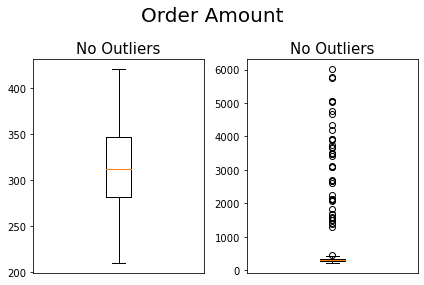

In [28]:
# Boxplot order_amount
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(subset['mean_amount'], showfliers=False)
ax[0].set_title("No Outliers", fontsize=15)
ax[0].get_xaxis().set_visible(False)
ax[1].boxplot(subset['mean_amount'], showfliers=True)
ax[1].set_title("No Outliers", fontsize=15)
ax[1].get_xaxis().set_visible(False)
plt.suptitle('Order Amount', fontsize=20)
fig.tight_layout()
plt.show()

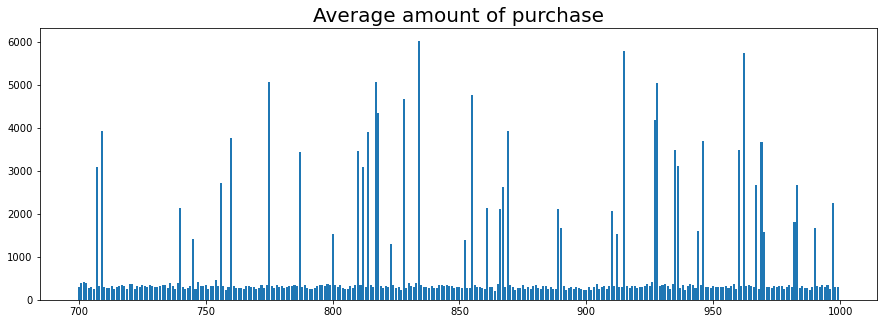

In [29]:
# Average amount of purchase
fig = plt.figure(figsize=(15,5))
plt.bar(subset['user_id'], subset['mean_amount'])
plt.title('Average amount of purchase',fontsize=20)
plt.show()

In [30]:
subset = pd.DataFrame({'mean_amount': df_.groupby('shop_id')['order_amount'].mean()}).reset_index()
subset

,shop_id,mean_amount
0,1,308.818182
1,2,174.327273
2,3,305.250000
3,4,258.509804
4,5,290.311111
...,...,...
95,96,330.000000
96,97,324.000000
97,98,245.362069
98,99,339.444444


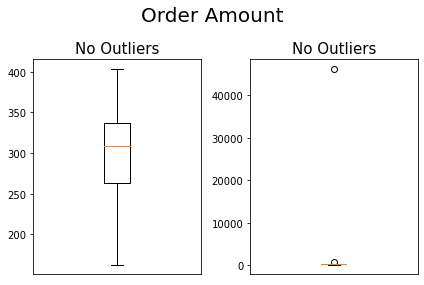

In [31]:
# Boxplot order_amount
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(subset['mean_amount'], showfliers=False)
ax[0].set_title("No Outliers", fontsize=15)
ax[0].get_xaxis().set_visible(False)
ax[1].boxplot(subset['mean_amount'], showfliers=True)
ax[1].set_title("No Outliers", fontsize=15)
ax[1].get_xaxis().set_visible(False)
plt.suptitle('Order Amount', fontsize=20)
fig.tight_layout()
plt.show()

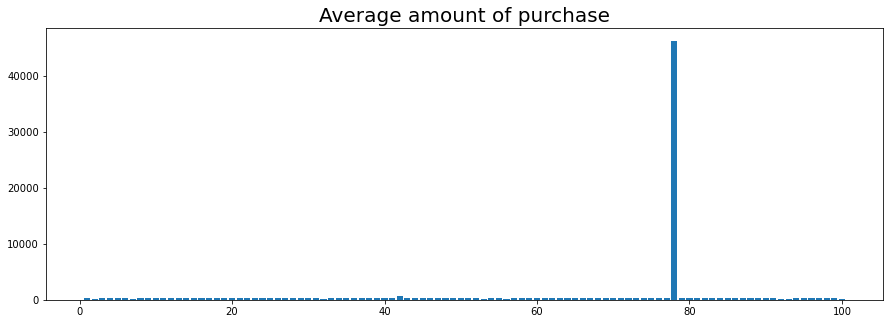

In [32]:
# Average amount of purchase
fig = plt.figure(figsize=(15,5))
plt.bar(subset['shop_id'], subset['mean_amount'])
plt.title('Average amount of purchase',fontsize=20)
plt.show()

In [33]:
# Exploring shop_id 78
shop_id_78 = subset[subset['shop_id']==78]
shop_id_78

,shop_id,mean_amount
77,78,46188.068182


In [34]:
shop_id_78 = df_[df_['shop_id']==78]
len(shop_id_78)

44

In [35]:
shop_id_78.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,44.000000,44.0,44.000000,44.000000,44.000000
mean,2683.681818,78.0,869.818182,46188.068182,1.795455
std,1325.879327,0.0,81.682674,21184.008674,0.823479
min,161.000000,78.0,707.000000,25725.000000,1.000000
25%,1444.750000,78.0,813.500000,25725.000000,1.000000
50%,2796.500000,78.0,866.500000,51450.000000,2.000000
75%,3724.750000,78.0,938.000000,51450.000000,2.000000
max,4919.000000,78.0,997.000000,102900.000000,4.000000


In [36]:
df_ = df_[df_['shop_id']!=78]
df_.shape

(4937, 7)

In [37]:
subset = pd.DataFrame({'mean_amount': df_.groupby('shop_id')['order_amount'].mean()}).reset_index()
subset

,shop_id,mean_amount
0,1,308.818182
1,2,174.327273
2,3,305.250000
3,4,258.509804
4,5,290.311111
...,...,...
94,96,330.000000
95,97,324.000000
96,98,245.362069
97,99,339.444444


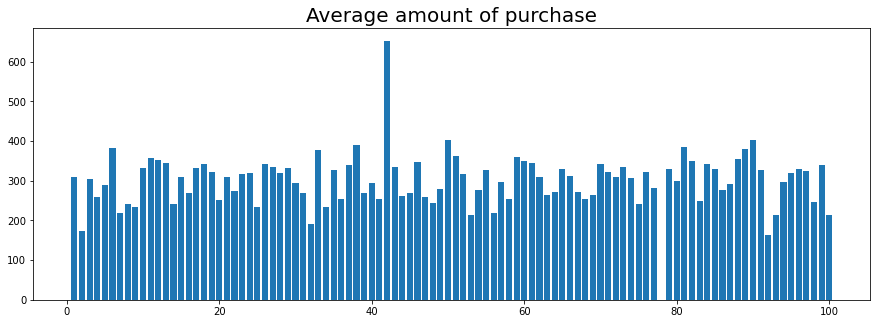

In [38]:
# Average amount of purchase
fig = plt.figure(figsize=(15,5))
plt.bar(subset['shop_id'], subset['mean_amount'])
plt.title('Average amount of purchase',fontsize=20)
plt.show()

In [39]:
# Exploring shop_id 42
shop_id_42 = subset[subset['shop_id']==42]
shop_id_42

,shop_id,mean_amount
41,42,652.235294


In [40]:
shop_id_42 = df_[df_['shop_id']==42]
len(shop_id_42)

34

In [41]:
shop_id_42.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,34.000000,34.0,34.000000,34.000000,34.000000
mean,2494.764706,42.0,834.382353,652.235294,1.852941
std,1443.396921,0.0,79.343524,358.681682,1.018982
min,41.000000,42.0,720.000000,352.000000,1.000000
25%,1394.000000,42.0,770.000000,352.000000,1.000000
50%,2164.000000,42.0,819.000000,704.000000,2.000000
75%,3852.500000,42.0,899.500000,704.000000,2.000000
max,4768.000000,42.0,975.000000,1760.000000,5.000000


In [42]:
shop_id_42

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04
1364,1365,42,797,1760,5,cash,2017-03-10 6:28:21
1367,1368,42,926,1408,4,cash,2017-03-13 2:38:34
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22


In [43]:
shop_id_42_ = pd.DataFrame({'mean_amount': df_.groupby('shop_id')['order_amount'].mean()}).reset_index()
shop_id_42__ = pd.DataFrame({'median_amount': df_.groupby('shop_id')['order_amount'].median()}).reset_index()

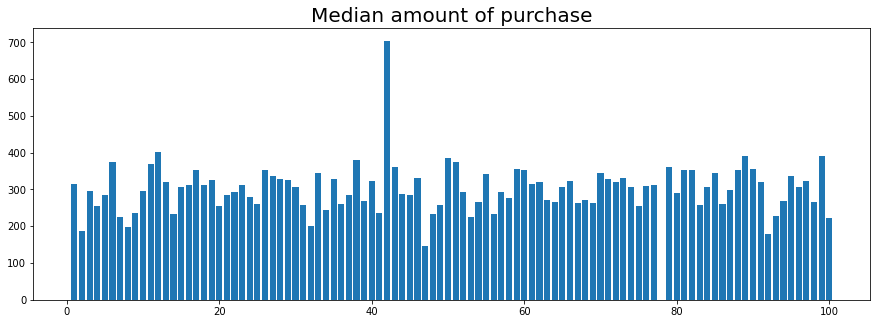

In [44]:
# Median amount of purchase
fig = plt.figure(figsize=(15,5))
plt.bar(shop_id_42__['shop_id'], shop_id_42__['median_amount'])
plt.title('Median amount of purchase',fontsize=20)
plt.show()

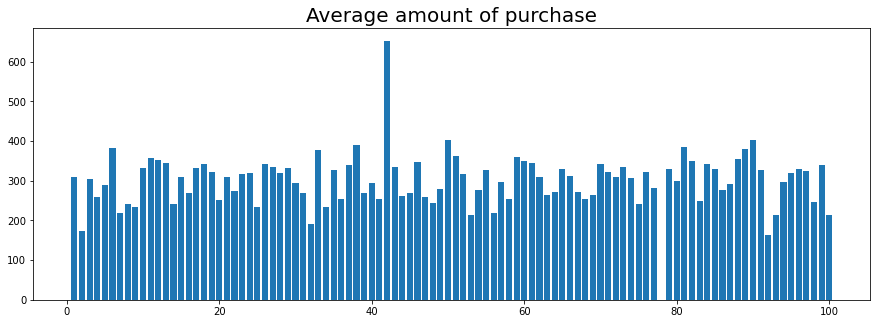

In [45]:
# Average amount of purchase
fig = plt.figure(figsize=(15,5))
plt.bar(shop_id_42_['shop_id'], shop_id_42_['mean_amount'])
plt.title('Average amount of purchase',fontsize=20)
plt.show()

<b>Other outliers related to shop_id:</b>
<br>
I have found another outlier, and it is related to a shop_id 78. Again, let's assume this is an online store, so the average purchase amount directly impacts the result.

Shop_id 42 raises some red concerns, but looking deep into the data and the in media and average are consistent.

# AOV

In [46]:
# Calculating AOV (dividing the total revenue by the total number of orders)
order_amount_sum = df_['order_amount'].sum()
order_amount_sum 

1493840

In [47]:
total_items_sum= df_['total_items'].sum()
total_items_sum

9848

In [48]:
# AOV
AOV = order_amount_sum /total_items_sum
AOV

151.68968318440292

# Metric

In [49]:
df_.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


In [50]:
# Median of dataset as it is
print('median: ', np.median(df_['order_amount']))

median:  284.0


In [51]:
# Filtering dataset to only include 50% of values (IQR)
filter_df = df_[(df_['order_id'] > 163) & (df_['order_id'] < 397)]

In [52]:
#IQR median
print('IQR median: ', np.median(filter_df['order_id']))

IQR median:  280.0
